In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
#from urllib.request import urlretrieve
from scipy.integrate import odeint
import pandas as pd
import numpy as np
from numpy import *
import matplotlib
import matplotlib.pyplot as plt
import sys
#import os

# Enable inline plotting
%matplotlib nbagg
%matplotlib inline

print('Python version ' + sys.version)
print('Numpy version ' + np.__version__)
print('Pandas version ' + pd.__version__)
#print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.3 |Anaconda, Inc.| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]
Numpy version 1.13.3
Pandas version 0.20.3
Matplotlib version 2.1.0


# 1 часть задания
У нас есть два стержня, свойстами которых мы можем пренебречь. Их длина l и 2l. На их концах закреплены одинаковые по модулю заряды. На каждом стержне один заряд со знаком "+", другой со знаком "-".

Нужно построить граффик изменения угла между стержнями.

In [2]:
q = 1.
l = 1.


Дормула для подсчёта трека альфы:

$$\begin{cases}
 & \dot{\alpha} = \omega  \\ 
 & \dot{\omega}= \frac{5q^2\sin(\alpha)}{l^3} \left( \frac{1}{(5-4cos(\alpha))^{3/2}} + \frac{1}{(5+4sin(\alpha))^{3/2}} \right)  
\end{cases}$$

In [3]:
def fun(date, t):
	a = date[0]
	w = date[1]
	d = (w, 
         5*q**2 *sin(a)*(1/(l**3 *(4 *cos(a) + 5))**(3/2) + 1/(-l**3 *(4*cos(a) - 5))**(3/2)))
	return vstack(d).ravel()

Wall time: 162 ms


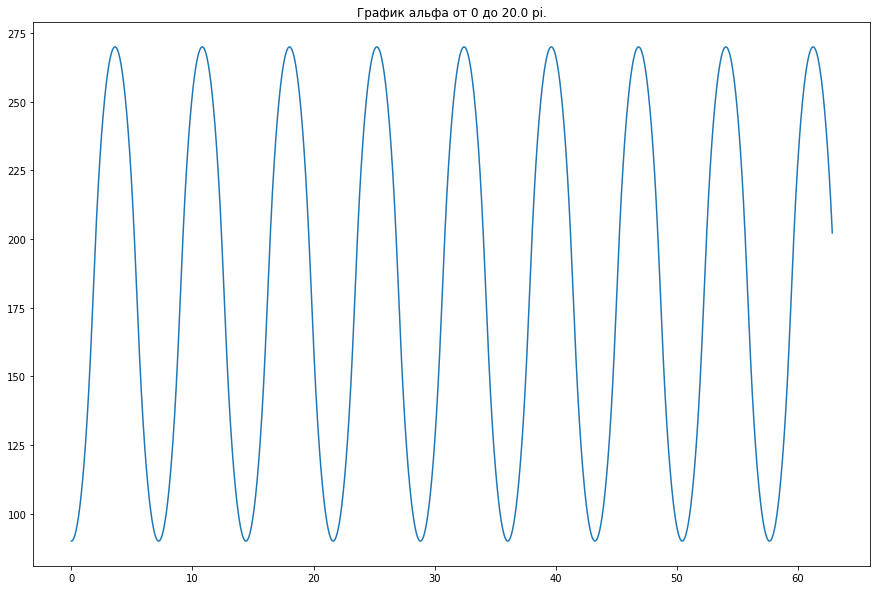

In [4]:
%%time

begin,end = 0,20*np.pi

t = linspace(begin,end, 10 ** 4)
date0 = array([np.pi/2,.0])

result = odeint(fun, date0, t)

plt.figure(figsize=(15,10))

plt.title('График альфа от {} до {} pi.'.format(round(begin,2),round(end/np.pi,2)))
plt.plot(t ,[i[0]/np.pi*180 for i in result])

Wall time: 1.89 s


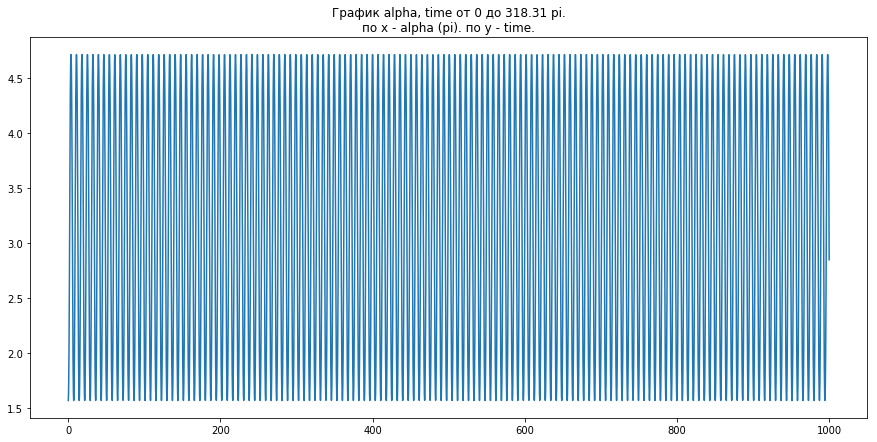

In [5]:
%%time

begin,end = 0,1000.0

t = linspace(begin,end, 10 ** 4)
date0 = array([np.pi/2,.0])

result = odeint(fun, date0, t)

plt.figure(figsize=(15,7))

plt.title('График alpha, time от {} до {} pi.\nпо х - alpha (pi). по у - time.'.format(round(begin,2),round(end/np.pi,2)))
plt.plot(t ,result[:,0])

# 2 часть задания

Суть такая. Задача состоит в том, чтобы исследовать устойчивость всей системы относительно начальных данных-а именно скорости и координаты.

Для того, чтобы это исследовать, мы введем несколько новых параметров, которые будем интегрировать, получится, соответственно, несколько новых уравнений

Короче, к системе добавятся 4 новых уравнения.

И уравнения, соответственно:

(дельта)' = J * дельта.
J-это матрица Якоби начальной системы, той, которая со скоростью и углом
А оставшиеся два... Блин. Это некие параметры устойчивости.

Q и dzeta

Q' = ln||delta||

dzeta' = Q/t

Начальное значение дельта берешь произвольно, но в разумных пределах. То есть что-то вроде "ну это что-то маленькое". Начальные значение Q и dzeta-нули

И еще надо будет в каждый момент времени считать для этой системы некий численный критерий устойчивости. Показатель Мегно. 

Y = 2 * (ln||delta|| - Q/t)

и его усредненное значение Ysr=2 * (Q - dzeta)/t

Вот этот вот усредненный должен не превышать двойку, короче
Блин. Тут очень криво все вышло.


________________________________________
## Уравнения

$$ {\delta}' = J * \delta $$
J-это матрица Якоби начальной системы, той, которая со скоростью и углом/

$${Q}' = \ln \left \| \delta \right \|$$
$$ {\zeta}' = \frac{Q}{t}$$ 
$$ Y = 2 * \left (\ \ln \left \| \delta \right \| - \frac{Q}{t} \right )$$
$$ Ysr=2 *  \frac{\left ( Q - \zeta \right )}{t}$$

$$J=\begin{vmatrix}
\frac{\partial {\alpha}' }{\partial \alpha } & \frac{\partial {\alpha}' }{\partial \omega  }\\ 
\frac{\partial {\omega}' }{\partial \alpha } & \frac{\partial {\omega}' }{\partial \omega } \\
\end{vmatrix}$$



$$\frac{\partial {\alpha}' }{\partial \alpha } = 0$$
$$\frac{\partial {\alpha}' }{\partial \omega  } = 1$$
$$\frac{\partial {\omega}' }{\partial \alpha } = 5 b^2 (Cos[a] (1/(l^3 (4 Cos[a] + 5))^(3/2) + 1/(-(l^3 (4 Cos[a] - 5)))^(3/2)) + 6 l^3 Sin[a]^2 (1/(l^3 (4 Cos[a] + 5))^(5/2) - 1/(-(l^3 (4 Cos[a] - 5)))^(5/2)))$$
$$\frac{\partial {\omega}' }{\partial \omega } = 0$$

In [6]:
 J = lambda a,l,q: np.array([[0,
                            1],
                            [-1. * 5 *(q**2) *(np.cos(a) *(1/((l**3) *(4 *np.cos(a) + 5))**(3/2) + 1/(-(l**3) *(4*np.cos(a) - 5))**(3/2)) + 6 *(l**3) *np.sin(a)*np.sin(a)* (1/(l**3 *(4*np.cos(a) + 5))**(5./2.) - 1/(-(l**3) *(4 *np.cos(a) - 5))**(5./2.))),
                            0]])


delta = np.array([e-10,e-12])
def fun_st(date, t):
    q = 1.
    l = 1.
    a = date[0]
    w = date[1]
    delta = date[2:4]
    Q_ = date[4]
    zeta = date[5]
    d = (w, 
         5*q**2 *sin(a)*(1/(l**3 *(4 *cos(a) + 5))**(3/2) + 1/(-l**3 *(4*cos(a) - 5))**(3/2)),
         vstack(np.dot(J(a,l,q),delta)),
         np.log(np.linalg.norm(delta)),
         Q_ / t,
        )
    return vstack(d).ravel()

    
    

Wall time: 36 ms


C:\Users\pa_antya\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\pa_antya\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


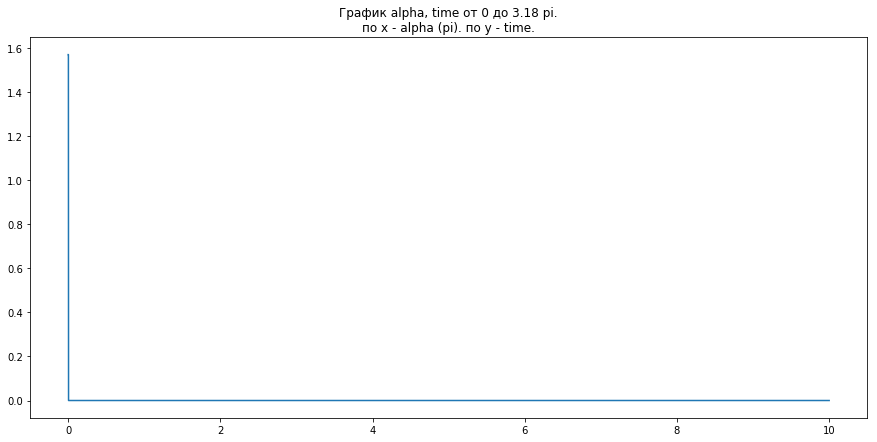

In [7]:
%%time

begin,end = 0,10.0

t = linspace(begin,end, 10 ** 4)
date0 = np.array([np.pi/2,
               .0,
               e-10,
               e-12,
               .0,
               .0               
              ])

q = 1.
l = 1.

result2 = odeint(fun_st, date0, t)

plt.figure(figsize=(15,7))

plt.title('График alpha, time от {} до {} pi.\nпо х - alpha (pi). по у - time.'.format(round(begin,2),round(end/np.pi,2)))
plt.plot(t ,result2[:,0])